In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
#sd = stress data
sd = pd.read_csv('Data.csv')
sd.head()

,Participant,HR,respr,Time(sec),Label
0,2,118.00,12.127693,1644227583,0
1,2,113.50,12.127693,1644227584,0
2,2,93.00,12.127693,1644227585,0
3,2,93.25,12.127693,1644227586,0
4,2,86.40,12.127693,1644227587,0


In [3]:
sd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112516 entries, 0 to 112515
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Participant  112516 non-null  int64  
 1   HR           112472 non-null  float64
 2   respr        112516 non-null  float64
 3   Time(sec)    112516 non-null  int64  
 4   Label        112516 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 4.3 MB


In [4]:
sd.isnull().sum()

Participant     0
HR             44
respr           0
Time(sec)       0
Label           0
dtype: int64

In [5]:
sd.dropna(inplace = True)

In [6]:
sd.isnull().sum()

Participant    0
HR             0
respr          0
Time(sec)      0
Label          0
dtype: int64

In [7]:
sd['Time(sec)'] = sd['Time(sec)'].apply(lambda x: datetime.utcfromtimestamp(x))

In [8]:
sd.head()

,Participant,HR,respr,Time(sec),Label
0,2,118.00,12.127693,2022-02-07 09:53:03,0
1,2,113.50,12.127693,2022-02-07 09:53:04,0
2,2,93.00,12.127693,2022-02-07 09:53:05,0
3,2,93.25,12.127693,2022-02-07 09:53:06,0
4,2,86.40,12.127693,2022-02-07 09:53:07,0


In [9]:
sd["Hour"] = sd["Time(sec)"].dt.hour.astype(int)
sd["Minutes"] = sd["Time(sec)"].dt.minute.astype(int)
sd["Seconds"] = sd["Time(sec)"].dt.second.astype(int)
sd["Days"] = sd["Time(sec)"].dt.day.astype(int)
sd["Months"] = sd["Time(sec)"].dt.month.astype(int)
sd["Weeks"] = sd["Time(sec)"].dt.isocalendar().week.astype(int)

In [10]:
sd.head()

,Participant,HR,respr,Time(sec),Label,Hour,Minutes,Seconds,Days,Months,Weeks
0,2,118.00,12.127693,2022-02-07 09:53:03,0,9,53,3,7,2,6
1,2,113.50,12.127693,2022-02-07 09:53:04,0,9,53,4,7,2,6
2,2,93.00,12.127693,2022-02-07 09:53:05,0,9,53,5,7,2,6
3,2,93.25,12.127693,2022-02-07 09:53:06,0,9,53,6,7,2,6
4,2,86.40,12.127693,2022-02-07 09:53:07,0,9,53,7,7,2,6


In [11]:
sd.drop(["Participant","Time(sec)", "Weeks"], axis = 1, inplace = True)

In [12]:
sd.head()

,HR,respr,Label,Hour,Minutes,Seconds,Days,Months
0,118.00,12.127693,0,9,53,3,7,2
1,113.50,12.127693,0,9,53,4,7,2
2,93.00,12.127693,0,9,53,5,7,2
3,93.25,12.127693,0,9,53,6,7,2
4,86.40,12.127693,0,9,53,7,7,2


In [13]:
sd['Label'].value_counts()

0    75657
1    36815
Name: Label, dtype: int64

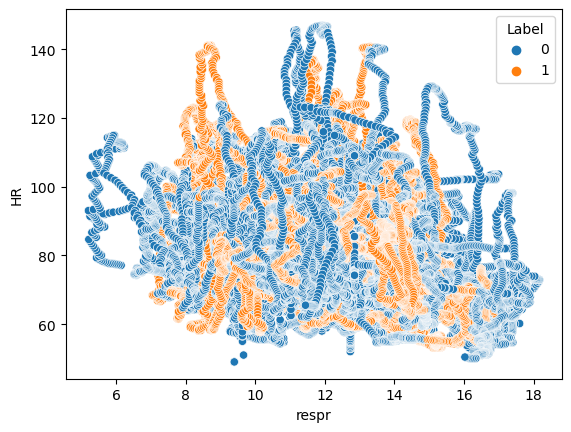

In [14]:
sns.scatterplot(x = "respr", y = "HR", hue = "Label", data = sd);

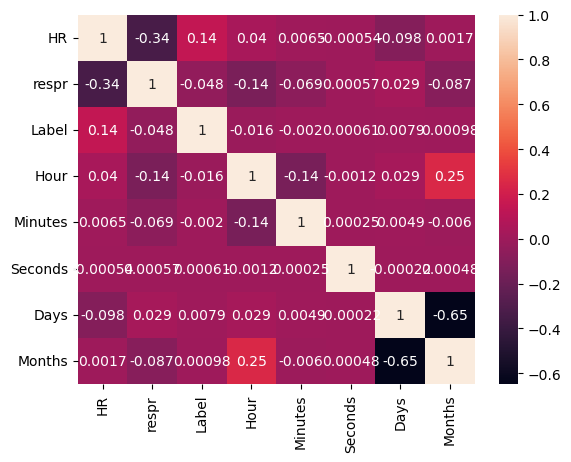

In [15]:
sns.heatmap(sd.corr(), annot = True);

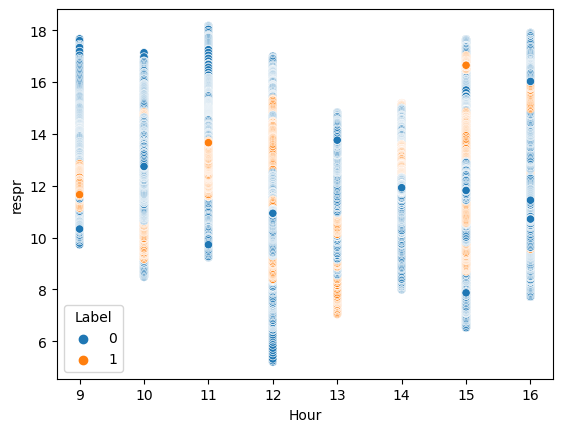

In [16]:
sns.scatterplot(x = "Hour", y = "respr", hue = "Label", data = sd);

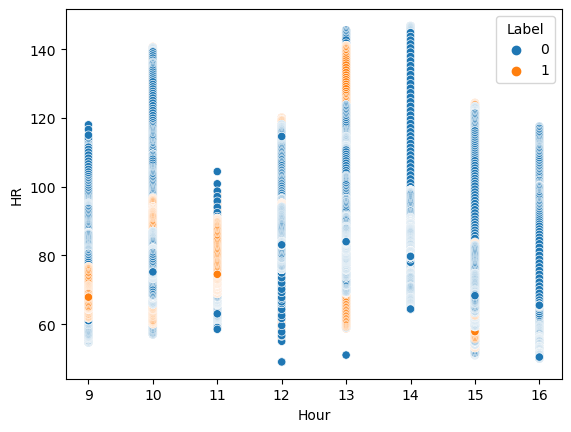

In [17]:
sns.scatterplot(x = "Hour", y = "HR", hue = "Label", data = sd);

In [18]:
X = sd.drop('Label', axis = 1)
y = sd['Label']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)

In [20]:
y_count = y.value_counts()
y_train_values = y_train.value_counts()
y_test_values = y_test.value_counts()
print(f"Total Label Count in the Dataset:\n{y_count}")
print(f"Total Label count in the Training Data:\n{y_train_values}")
print(f"Total Label count in the Testing Data:\n{y_test_values}")

Total Label Count in the Dataset:
0    75657
1    36815
Name: Label, dtype: int64
Total Label count in the Training Data:
0    60524
1    29453
Name: Label, dtype: int64
Total Label count in the Testing Data:
0    15133
1     7362
Name: Label, dtype: int64


In [21]:
total_label_proportion = y.value_counts(normalize = True)
total_training_label_proportion = y_train.value_counts(normalize = True)
total_testing_label_proportion = y_test.value_counts(normalize = True)
print(f"Total Label proportion in the Dataset:\n{total_label_proportion}")
print(f"Total Label proportion in the Training Data:\n{total_training_label_proportion}")
print(f"Total Label proportion in the Testing Data:\n{total_testing_label_proportion}")

Total Label proportion in the Dataset:
0    0.672674
1    0.327326
Name: Label, dtype: float64
Total Label proportion in the Training Data:
0    0.672661
1    0.327339
Name: Label, dtype: float64
Total Label proportion in the Testing Data:
0    0.672727
1    0.327273
Name: Label, dtype: float64


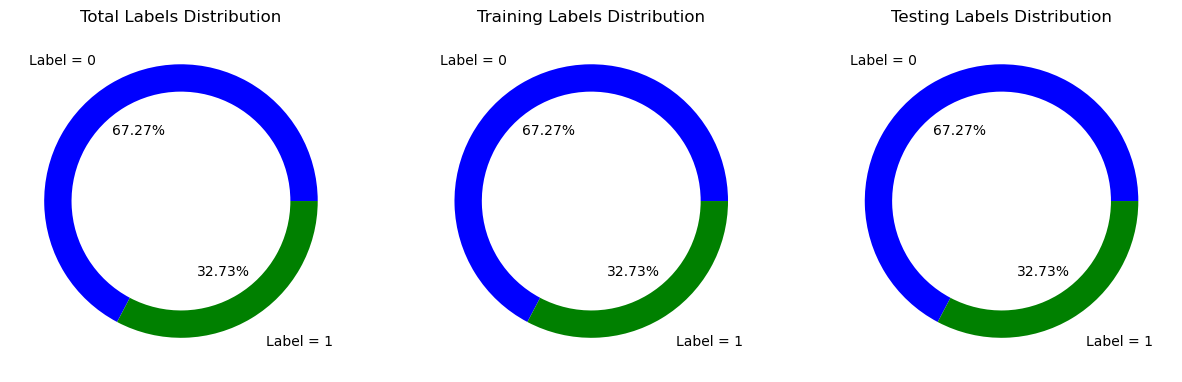

In [76]:
fig, axes = plt.subplots(1, 3, figsize = (15,5))
wedge = dict(width = 0.2)
label_distance = 1.2
axes[0].pie(total_label_proportion, labels = ["Label = 0", "Label = 1"], autopct = "%1.2f%%", startangle = 0, 
            wedgeprops = wedge, labeldistance = label_distance, colors = ['blue', 'green'])
axes[0].add_artist(plt.Circle((0,0), 0.6, fc = "white"))
axes[0].set_title("Total Labels Distribution")

axes[1].pie(total_training_label_proportion, labels = ["Label = 0", "Label = 1"], autopct = "%1.2f%%", startangle = 0, 
            wedgeprops = wedge, labeldistance = label_distance, colors = ['blue', 'green'])
axes[1].add_artist(plt.Circle((0,0), 0.6, fc = "white"))
axes[1].set_title("Training Labels Distribution")

axes[2].pie(total_testing_label_proportion, labels = ["Label = 0", "Label = 1"], autopct = "%1.2f%%", startangle = 0, 
            wedgeprops = wedge, labeldistance = label_distance, colors = ['blue', 'green'])
axes[2].add_artist(plt.Circle((0,0), 0.6, fc = "white"))
axes[2].set_title("Testing Labels Distribution")
plt.show()

In [40]:
#Decision Tree Classifier
#Training Data
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_training_predictions = dt.predict(X_train)
print(accuracy_score(y_train, dt_training_predictions))

1.0


In [42]:
print("Classification Report and Confusion Matrix for Decision Tree (Training Set)")
print("")
print(classification_report(y_train, dt_training_predictions))
print(confusion_matrix(y_train, dt_training_predictions))

Classification Report and Confusion Matrix for Decision Tree (Training Set)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     60524
           1       1.00      1.00      1.00     29453

    accuracy                           1.00     89977
   macro avg       1.00      1.00      1.00     89977
weighted avg       1.00      1.00      1.00     89977

[[60524     0]
 [    0 29453]]


In [43]:
#Testing Data
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_testing_predictions = dt.predict(X_test)
print(accuracy_score(y_test, dt_testing_predictions))

0.9931984885530117


In [44]:
print("Classification Report and Confusion Matrix for Decision Tree (Testing Set)")
print("")
print(classification_report(y_test, dt_testing_predictions))
print(confusion_matrix(y_test, dt_testing_predictions))

Classification Report and Confusion Matrix for Decision Tree (Testing Set)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     15133
           1       0.99      0.99      0.99      7362

    accuracy                           0.99     22495
   macro avg       0.99      0.99      0.99     22495
weighted avg       0.99      0.99      0.99     22495

[[15063    70]
 [   83  7279]]


In [45]:
#Random Forest Classifier
#Training Data
rfc = RandomForestClassifier(n_estimators = 500)
rfc.fit(X_train, y_train)
rfc_training_predictions = rfc.predict(X_train)
accuracy_score(y_train, rfc_training_predictions)

1.0

In [46]:
print("Classification Report and Confusion Matrix for Random Forest (Training Set)")
print("")
print(classification_report(y_train, rfc_training_predictions))
print(confusion_matrix(y_train, rfc_training_predictions))

Classification Report and Confusion Matrix for Random Forest (Training Set)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     60524
           1       1.00      1.00      1.00     29453

    accuracy                           1.00     89977
   macro avg       1.00      1.00      1.00     89977
weighted avg       1.00      1.00      1.00     89977

[[60524     0]
 [    0 29453]]


In [47]:
#Testing Data
rfc = RandomForestClassifier(n_estimators = 200)
rfc.fit(X_train, y_train)
rfc_testing_predictions = rfc.predict(X_test)
accuracy_score(y_test, rfc_testing_predictions)

0.9971549233162925

In [48]:
print("Classification Report and Confusion Matrix for Random Forest (Testing Set)")
print("")
print(classification_report(y_test, rfc_testing_predictions))
print(confusion_matrix(y_test, rfc_testing_predictions))

Classification Report and Confusion Matrix for Random Forest (Testing Set)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15133
           1       1.00      0.99      1.00      7362

    accuracy                           1.00     22495
   macro avg       1.00      1.00      1.00     22495
weighted avg       1.00      1.00      1.00     22495

[[15108    25]
 [   39  7323]]
